In [ ]:
import shapely
from shapely.geometry import Point, Polygon, LineString, GeometryCollection
from shapely import wkt
import numpy as np
from shapely.ops import nearest_points
import random


In [ ]:
pt = Point(10,10)
pt1 = Point(100,101)
pt

In [ ]:
wkt.loads(str(pt))

In [ ]:
GeometryCollection([pt,pt1])

In [ ]:
pt.distance(pt1)
pt.x, pt.y, pt.xy[1]

In [ ]:
pt.name = "Point 1"
pt.name

In [ ]:
ln = LineString([(1,1),[1,2],[2,2],(1.5,1.5)])
a=np.array(ln)
# list(ln.xy[0])
# ln.xy[1][1]
a

In [ ]:
Point([1,1.5]).distance(ln)
# ln.project(Point([1,1])), ln.length
GeometryCollection([Point([1.2,1.5]),ln])

In [ ]:
poly = Polygon([(50,50), (50,3950), (3950,3950), (3950,50)])
poly

In [ ]:
p=poly.exterior
np.array(p)

In [ ]:
point = np.array((55,100))
point
pt = Point(point)
poly.contains(pt)

circle = pt.buffer(40)
circle.contains(Point([50,100]))

a = poly.exterior.project(pt)
b =poly.exterior.interpolate(a)


In [ ]:
list(pt.coords[0]) == [pt.x, pt.y]


In [ ]:
c1 = Point([1,1]).buffer(2)
c2 = Point([1,2]).buffer(2)
c3 = Point([2,1]).buffer(2)
c1.difference(c2).difference(c3)

In [ ]:
Min = 50
Max = 3950
field = Polygon([(Min,Min), (Min,Max), (Max,Max), (Max,Min)])
field
pt = Point(point)
pt_new,_ = nearest_points(field,Point([0,0]))
pt = pt_new
field.difference(pt.buffer(400))

print([pt.x, pt.y])


In [ ]:
def get_random_arrangement(n_turbs):

    def get_point():
        """Returns random integer from 50 to 3950 inclusive"""
        return random.uniform(50,3950)

    def is_valid(point):
        """Checks if given point is valid"""
        point = np.array(point)
        point = np.reshape(point,(1,2))
        # getting array of distances to every other point
        dist = np.linalg.norm(turbine_pos - point,axis=1)
        return min(dist) > 400   # 400 is the problem constraint

    turbine_pos = np.full((n_turbs,2),np.inf)
    turb_list = []
    count = 0
    while count < n_turbs:
        point = [get_point(),get_point()] # x,y
        if is_valid(point):
            turbine_pos[count,:] = point
            count += 1
            # turb_list.append(point)
    return turbine_pos

In [ ]:
turb = get_random_arrangement(50)
turb

In [ ]:
from numpy import array
a = [array([1596.36676121,  138.45422947]), array([ 977.41222868, 3397.30858118]), array([1371.70470451,  531.2721245 ]), array([2152.18943217, 3880.48267978]), array([1474.30494376, 1761.45855404]), array([145.58466423, 170.67563354]), array([2876.71154606, 3241.47635077]), array([ 578.94637377, 3696.4916067 ]), array([1392.52440778, 2270.74510658]), array([1791.96180458, 2126.66951367]), array([1172.20025507, 1233.44428622]), array([1276.35619279, 3064.07883597]), array([2331.18901678,  291.90218119]), array([2341.52245709, 3525.57889301]), array([3510.0296964 ,  306.20498409]), array([3407.70024525, 2624.86909089]), array([3946.70422003, 1924.97876881]), array([3793.33607545, 1507.35748822]), array([3460.18500294,  805.0856397 ]), array([2043.56499184, 2815.61213104]), array([3777.90578332, 3084.70566871]), array([762.17779674, 148.1203289 ]), array([ 749.75514296, 1899.91662296]), array([3224.65576059, 1496.38742026]), array([ 175.77767411, 1383.17447608]), array([ 672.94228433, 2378.52148934]), array([2254.93414603,  711.87246433]), array([1178.47195092, 3940.70301147]), array([2717.08265181, 1296.4174027 ]), array([2966.97119241, 2489.45494755]), array([448.92815815, 740.20884466]), array([2881.69941061, 1785.83880112]), array([ 185.04395974, 1981.40952189]), array([2969.26296853, 3788.86913382]), array([2853.66198343,   81.1139672 ]), array([3777.49797618, 3493.83819141]), array([1653.03887257, 1287.00257804]), array([ 763.13090013, 1241.02433756]), array([2441.31059335, 2213.22435888]), array([2239.50479809, 1642.52236884]), array([3918.47611465, 2700.96671189]), array([1663.29742039, 3692.1217649 ]), array([ 577.47046314, 3218.57543382]), array([  77.07732733, 3390.31945306]), array([ 163.08420983, 2685.67971257]), array([3314.21289245, 3409.40469451]), array([3949.64802346,   62.34615667]), array([ 188.30677386, 3924.57049728]), array([3421.82260615, 2099.06969608]), array([3880.21797336, 1037.58085478])]


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

b = pd.DataFrame(a,columns=['x','y'])
b.head()
b.to_csv("data.csv", index=False)
plt.scatter(b.x,b.y)


In [ ]:
a = np.array(pd.read_csv("/home/ananthu/Workspace/Shell AI Hackathon/Trials/opt_swarm_ans7.csv"))

In [3]:
a = np.array(pd.read_csv("/home/ananthu/Workspace/Shell AI Hackathon/EA/inter_data_0.csv"))

In [4]:
from shapely.geometry import MultiPoint
points = MultiPoint(a)


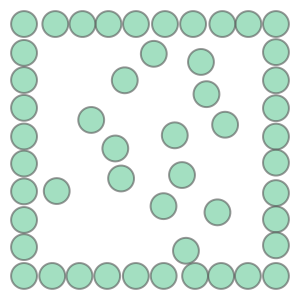

In [5]:
points.buffer(200)

In [ ]:
p = [[1],[2],[3]]

q = random.choices(population=p,k=2)


In [ ]:
q[1] is p[0]

In [ ]:
a = np.array(pd.read_csv("/home/ananthu/Workspace/Shell AI Hackathon/PSO/oswarm3.csv"))

In [ ]:
np.linalg.norm(a)